<a href="https://colab.research.google.com/github/FarshadAmiri/Learning-Machine_Learning/blob/master/K-means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time

In [394]:
data1 = np.random.normal(75,12, size=(70,2))
data2_1 = np.random.normal(25,12, size=(80,1))
data2_2 = np.random.normal(85,9, size=(80,1))
data2 = np.hstack((data2_1,data2_2))
data3 = np.random.normal(loc=35, scale=10, size=(110,2))
data = np.vstack((data1,data2,data3))

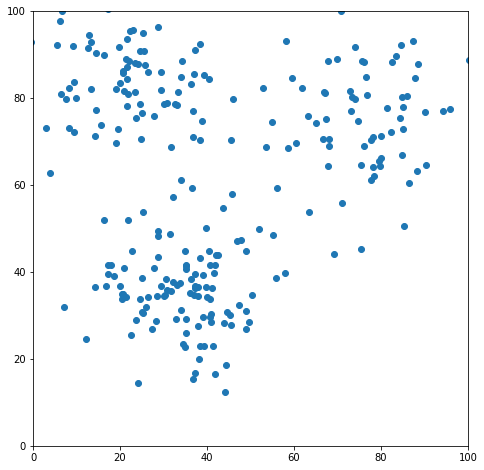

In [395]:
plt.figure(figsize=(8,8))
plt.xlim(0,100)
plt.ylim(0,100)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(data[:,0], data[:,1])

In [398]:
def kmeans(data, k, iterations):
  # creating data dictionary (naming each sample)
  data_dict = {}
  for i in range(len(data)):
    a,b = data[i]
    data_dict['d' + str(i+1)] = (a,b)

  # Initializing the centroids
  centroids = np.random.randint((data.min()+data.max()/4),(data.min()+data.max()/1.25),(k,2))
  c_dict = {}
  for i in range(k):
    c_dict['c' + str(i+1)] = tuple(centroids[i])

  plot_dict = {}

  for iteration in range(iterations) :

    # Calculate each sample distance from each centroid
    dst_dict = {}
    for i in data_dict:
      dst_dict[i] = []
      for j in range(k):
        dst = distance.euclidean(data_dict[i], c_dict['c' + str(j+1)])
        dst_dict[i].append(dst)
        
    # Assigning each sample to its closest centroid
    assignments_dict = {}
    for i in dst_dict:
      assignments_dict[i] = 'c' + str(dst_dict[i].index(min(dst_dict[i])) + 1)

    members_dict = {}
    for i in assignments_dict:
      if assignments_dict[i] in members_dict:
        members_dict[assignments_dict[i]].append(i)
      else:
        members_dict[assignments_dict[i]] = [i]

    for i in members_dict:
      x = 0
      y = 0
      for j in members_dict[i]:
        x += data_dict[j][0]
        y += data_dict[j][1]
      x /= len(members_dict[i])
      y /= len(members_dict[i])
      c_dict[i] = (x,y)


    for i in members_dict:
      plot_dict[str(i)+ '_x_' + str(iteration+1)] = []
      plot_dict[str(i)+ '_y_' + str(iteration+1)] = []
      for j in members_dict[i]:
        plot_dict[str(i)+ '_x_' + str(iteration+1)].append(data_dict[j][0])
        plot_dict[str(i)+ '_y_' + str(iteration+1)].append(data_dict[j][1])
    
  for j in range(iterations):
    for i in range(int(len(plot_dict.keys())/(2*iterations))):
      plt.scatter(x = plot_dict['c' + str(i+1) + '_x_' + str(j+1)], y = plot_dict['c' + str(i+1) + '_y_' + str(j+1)])
      plt.title('Iteration No. %i'%(j+1))
    if j == iterations - 1:
      break
    else:
      plt.pause(2)

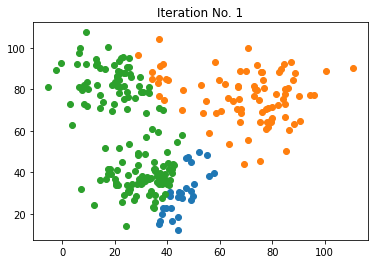

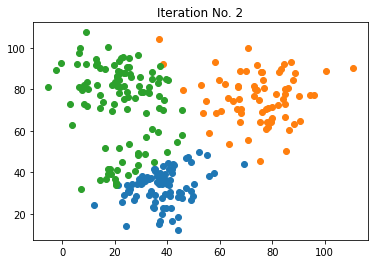

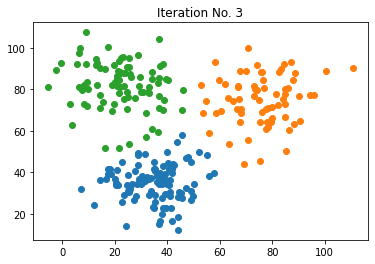

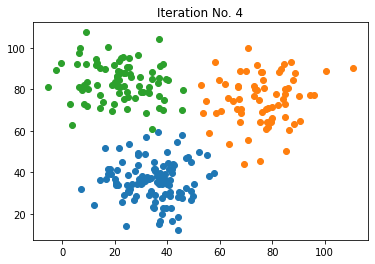

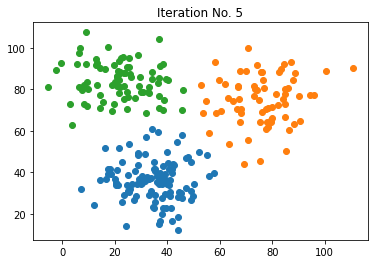

In [401]:
kmeans(data, k=3, iterations=5)